<a href="https://colab.research.google.com/github/CrisvinK/BMEN6367_Homework/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMEN 6367 HW4
Crisvin Kadambathil (CSK180005)

In [ ]:
# Import Necessary Libraries
from google.colab import drive
import os
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive to Colab

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the file working directory

os.chdir('/content/drive/My Drive/Colab Notebooks/Datasets')

In [ ]:
# Import alzheimer dataset and arrange by label and features

all_data = np.array(pandas.read_csv('Alzheimers_Data.csv'))

# labels: 0 = Nondemented, 1 = Demented, 2 = Converted

y = all_data[:, 0]

# features: column |  feature
#           -----------------------------------------------------
#           0      |  Age
#           1      |  EDUC (Years)
#           2      |  SES (Socioeconomic Status)
#           3      |  MMSE (Mini Mental State Examination)
#           4      |  CDR (Clinical Dementia Rating)
#           5      |  eTIV (Estimated Total Intracranial Volume)
#           6      |  nWBV (Normalize Whole Brain Volume)
#           7      |  ASF (Atlas Scaling Factor)

X = all_data[:, 1:9]

In [ ]:
# Split the data into training and testing groups

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=20)

print('Training Set Size = %i' % np.shape(Xtrain)[0])
print('Test Set Size = %i' % np.shape(Xtest)[0])

Training Set Size = 265
Test Set Size = 89


In [22]:
# Create model and fit to existing data

# Model 1 uses a radial bias function kernal

model_1 = SVC(kernel='rbf', C=100, gamma=0.1)
model_1.fit(Xtrain, ytrain)

# Predict labels based on test set

yfit = model_1.predict(Xtest)

In [23]:
# Display classification report

label_names = ['Nondemended', 'Demented', 'Converted']
print(classification_report(ytest, yfit, target_names=label_names))

              precision    recall  f1-score   support

 Nondemended       0.62      1.00      0.76        48
    Demented       0.90      0.28      0.43        32
   Converted       1.00      0.11      0.20         9

    accuracy                           0.65        89
   macro avg       0.84      0.46      0.46        89
weighted avg       0.76      0.65      0.59        89



Text(109.44999999999997, 0.5, 'predicted label')

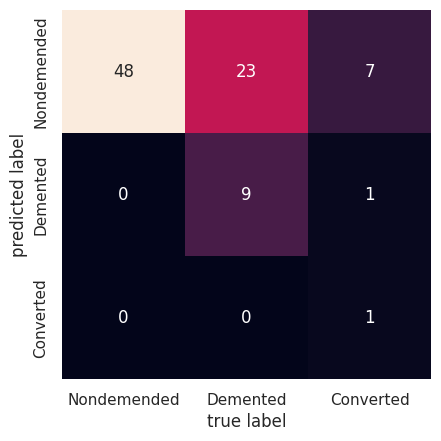

In [24]:
# Display confusion matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label')